# 데이터 인코딩

In [1]:
items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

## 레이블 인코딩(Label Encoding)

In [3]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit(items) # fit 데이터를 '먹인다' 변환준비
labels = encoder.transform(items) # transform 변환 수행

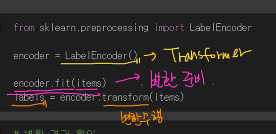


In [4]:
# 변환 결과 확인
print("인코딩 변환 값: {}".format(labels))
print("인코딩 클래스 : {}".format(encoder.classes_)) # fit할때 class값들 나옴
print("디코딩 원본 값: {}".format(encoder.inverse_transform([4,5,0,1,1,3,3,2,2,2])))

인코딩 변환 값: [0 1 4 5 3 3 2 2]
인코딩 클래스 : ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']
디코딩 원본 값: ['전자렌지' '컴퓨터' 'TV' '냉장고' '냉장고' '선풍기' '선풍기' '믹서' '믹서' '믹서']


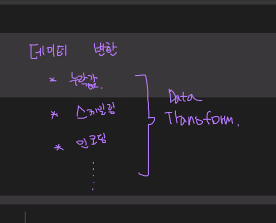
원본데이터 변환시키는것들

estimator의 목적은 예측predict⭐⭐

transformer의 목적은 변환transform⭐⭐

공통점 : feature을 입력해줘야함

# TransformerMixin 참고만하깅
fit_transform(X)제공 : 데이터 입력과 변환을 동시에

In [5]:
labels2 = encoder.fit_transform(items)
labels2

array([0, 1, 4, 5, 3, 3, 2, 2])

# One-Hot Encoding

In [6]:
# 무조건 무조건 2차원배열로 들어가야⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐

In [12]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items_arr = np.array(items).reshape(-1,1)
items_arr

array([['TV'],
       ['냉장고'],
       ['전자렌지'],
       ['컴퓨터'],
       ['선풍기'],
       ['선풍기'],
       ['믹서'],
       ['믹서']], dtype='<U4')

In [13]:
encoder = OneHotEncoder()

ohe_labels = encoder.fit_transform(items_arr)
ohe_labels

<8x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [15]:
print(ohe_labels)
# 압축된 희소행렬
# (행번호, 열번호) 에 1이들어가있다

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0


In [16]:
# 압축된 형식을 풀어서 표현
print(ohe_labels.toarray())

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [18]:
encoder.categories_

[array(['TV', '냉장고', '믹서', '선풍기', '전자렌지', '컴퓨터'], dtype='<U4')]

# feature 스케일링

#### Min-Max Scaling(정규화)
column 간에 다른 **min, max**값을 가지는 경우, **정규화**를 통해서 최대 / 최소의 척도를 하나로 맞춰 주는 작업
* 최소를 0으로, 최대를 1로 설정
------
* 네이버 영화 평점 ( 0 ~ 10 ) : [2, 4, 6, 8, 10]
* 넷플릭스 영화 평점 ( 0 ~ 5 ) : [1, 2, 3, 4, 5]


In [19]:
import pandas as pd
movie_score = pd.DataFrame({
    "naver":[0, 2, 4, 6, 8],
    "netflix":[1, 2, 3, 4, 5]
})

movie_score

,naver,netflix
0,0,1
1,2,2
2,4,3
3,6,4
4,8,5


In [20]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

In [21]:
movie_score_scaled = min_max_scaler.fit_transform(movie_score)
movie_score_scaled

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

In [22]:
pd.DataFrame(movie_score_scaled, columns=["네이버평점","넷플평점"])

,네이버평점,넷플평점
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


## StandardScaling(표준화)
평균이 0, 표준편차가 1이 되도록 반환

In [23]:
data1 = np.array([100, 110, 120, 130, 140])
data2 = np.array([0,1,2,3,4])


data1.mean(), data1.std()

(120.0, 14.142135623730951)

In [24]:
data2.mean(),data2.std()

(2.0, 1.4142135623730951)

In [26]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [28]:
data1_scaled = std_scaler.fit_transform(data1.reshape(-1,1)) # 2차원 배열이 들어가야
data2_scaled = std_scaler.fit_transform(data2.reshape(-1,1))

print(data1_scaled)
print(data2_scaled)

[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]
[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]
